# Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [107]:
ad = pd.read_csv('online_advertising_performance_data.csv')

#Printing Info of Dataset

In [108]:
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

#Describe Dataset

In [109]:
print(ad.describe())

                day       displays          cost        clicks       revenue  \
count  15408.000000   15408.000000  15408.000000  15408.000000  15408.000000   
mean      15.518886   15512.573014     11.370262    161.788487     17.929943   
std        8.740909   44392.392890     45.369499    728.276911     96.781834   
min        1.000000       0.000000      0.000000      0.000000      0.000000   
25%        8.000000      78.000000      0.024000      0.000000      0.000000   
50%       15.000000    1182.000000      0.339850      6.000000      0.483950   
75%       23.000000    8960.250000      2.536225     53.000000      3.839800   
max       31.000000  455986.000000    556.704800  14566.000000   2096.211600   

       post_click_conversions  post_click_sales_amount  Unnamed: 12  \
count            15408.000000             15408.000000          0.0   
mean                42.300623              2123.288058          NaN   
std                213.685660             10523.029607          Na

# Missing Values

In [110]:
print(ad.isnull().sum())

month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64


In [111]:
print(ad['campaign_number'].value_counts())

campaign_number
camp 3    6917
camp 1    6877
camp 2    1614
Name: count, dtype: int64


In [112]:
print(ad['banner'].unique())

['160 x 600' '240 x 400' '300 x 250' '468 x 60' '580 x 400' '670 x 90'
 '728 x 90' '800 x 250']


In [113]:
print(ad['placement'].value_counts())

placement
mno    4501
def    3538
ghi    3484
jkl    2504
abc     968
Name: count, dtype: int64


#Overall Trend In User Engagement

In [114]:
print(ad['user_engagement'].value_counts())

user_engagement
Medium    5489
Low       5035
High      4884
Name: count, dtype: int64


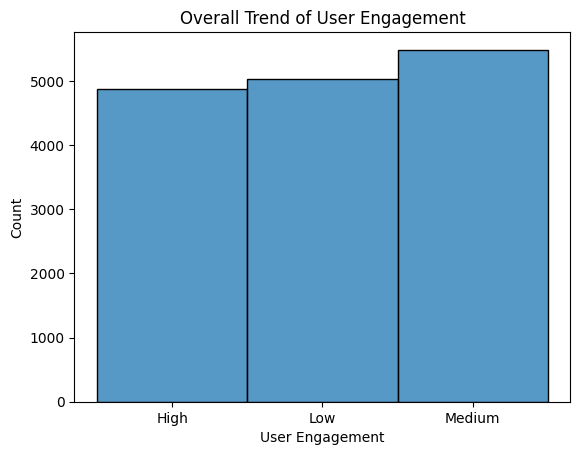

In [115]:
sns.histplot(x='user_engagement', data=ad)
plt.xlabel('User Engagement')
plt.title('Overall Trend of User Engagement')
plt.show()

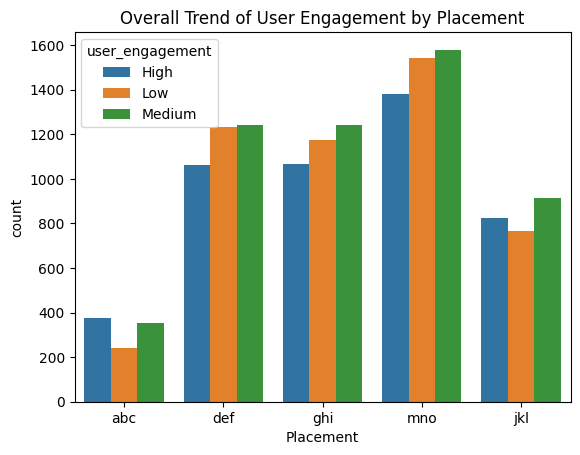

In [116]:
sns.countplot(x='placement', hue='user_engagement', data=ad)
plt.xlabel('Placement')
plt.title('Overall Trend of User Engagement by Placement')
plt.show()

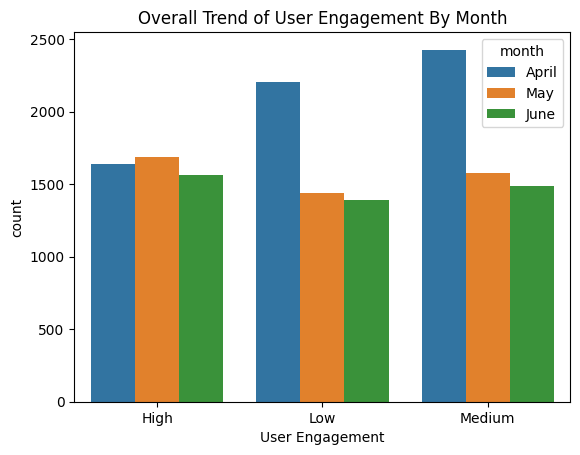

In [117]:
sns.countplot(x='user_engagement', hue='month', data=ad)
plt.xlabel('User Engagement')
plt.title('Overall Trend of User Engagement By Month')
plt.show()

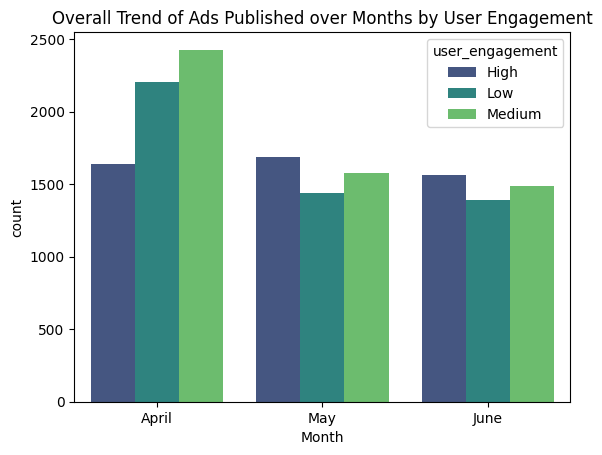

In [118]:
sns.countplot(x='month', hue='user_engagement', palette='viridis' ,data=ad)
plt.xlabel('Month')
plt.title('Overall Trend of Ads Published over Months by User Engagement')
plt.show()

#Impact of the no. of clicks by the size of ad

In [119]:
print(ad['banner'].value_counts())

banner
728 x 90     3142
300 x 250    2820
240 x 400    2425
670 x 90     2352
468 x 60     1899
160 x 600    1805
580 x 400     606
800 x 250     359
Name: count, dtype: int64


In [120]:
click_size_sum = ad.groupby('banner')['clicks'].sum()
print(click_size_sum)

banner
160 x 600     239570
240 x 400    1113256
300 x 250     411214
468 x 60        1295
580 x 400     120681
670 x 90       37203
728 x 90      569606
800 x 250         12
Name: clicks, dtype: int64


In [121]:
click_size_count = ad.groupby('banner')['clicks'].count()
print(click_size_count)

banner
160 x 600    1805
240 x 400    2425
300 x 250    2820
468 x 60     1899
580 x 400     606
670 x 90     2352
728 x 90     3142
800 x 250     359
Name: clicks, dtype: int64


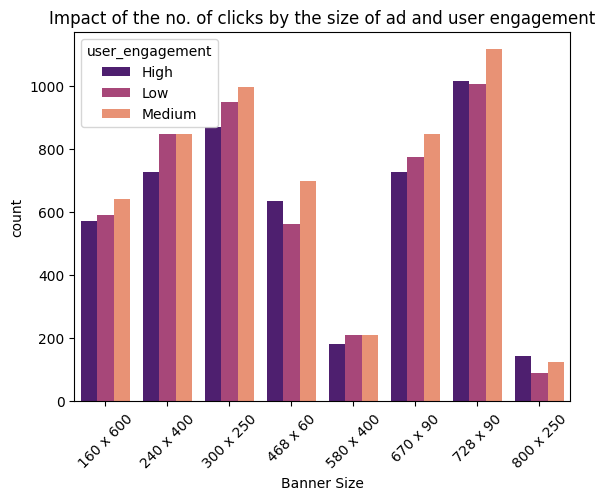

In [122]:

sns.countplot(x='banner', hue='user_engagement', palette='magma' ,data=ad)
plt.xlabel('Banner Size')
plt.title('Impact of the no. of clicks by the size of ad and user engagement')
plt.xticks(rotation=45)
plt.show()

#Yielded Highest Clicks And Displays

In [123]:
click_dis = ad.groupby(['placement'])[['clicks','displays']].count()
print(click_dis)

           clicks  displays
placement                  
abc           968       968
def          3538      3538
ghi          3484      3484
jkl          2504      2504
mno          4501      4501


In [124]:
placement_stats = ad.groupby('placement')[['clicks', 'displays']].sum()

top_placements = placement_stats.sort_values(['clicks', 'displays'], ascending=False)

print(top_placements)

            clicks   displays
placement                    
ghi        1247049   59740415
mno         993039  143161775
def         176097   28177492
jkl          75063    7692732
abc           1584     242142


In [125]:
placement_stats = ad.groupby('placement')[['clicks', 'displays']].sum()
print(placement_stats)

            clicks   displays
placement                    
abc           1584     242142
def         176097   28177492
ghi        1247049   59740415
jkl          75063    7692732
mno         993039  143161775


<ipython-input-126-7357422b60f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=ad, palette='Blues_d')


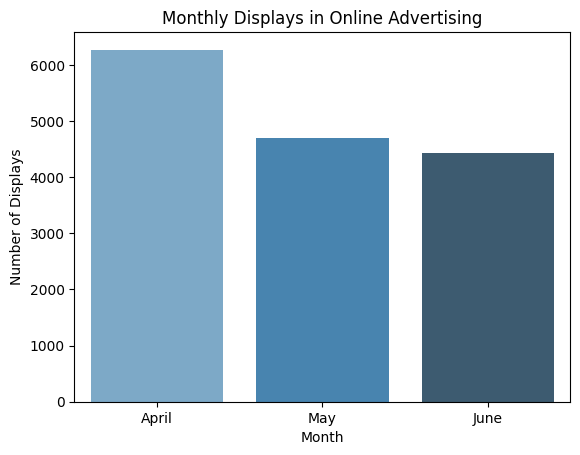

In [126]:
sns.countplot(x='month', data=ad, palette='Blues_d')
plt.title('Monthly Displays in Online Advertising')
plt.xlabel('Month')
plt.ylabel('Number of Displays')
plt.show()

In [127]:
month_dis = ad.groupby(['month'])['displays'].sum()
print(month_dis)

month
April    128866631
June      44094487
May       66056607
Name: displays, dtype: int64


<ipython-input-128-8cfcfa3abe47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='displays', data=month_dis, palette='Set2')


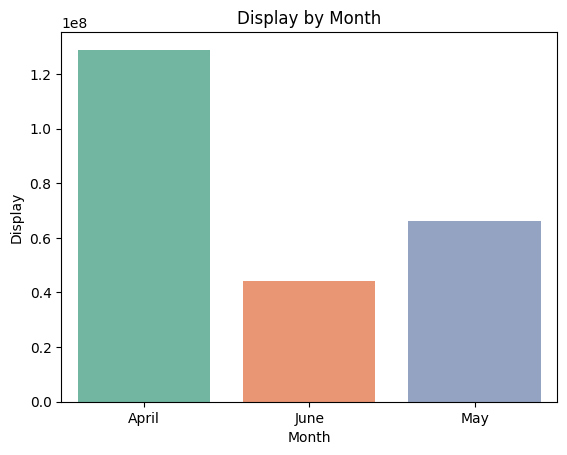

In [128]:
month_dis = ad.groupby(['month'])['displays'].sum().reset_index()

sns.barplot(x='month', y='displays', data=month_dis, palette='Set2')
plt.title('Display by Month')
plt.xlabel('Month')
plt.ylabel('Display')
plt.show()

<ipython-input-129-471ce6baeede>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='placement', y='cost', data=ad, palette='Set1')


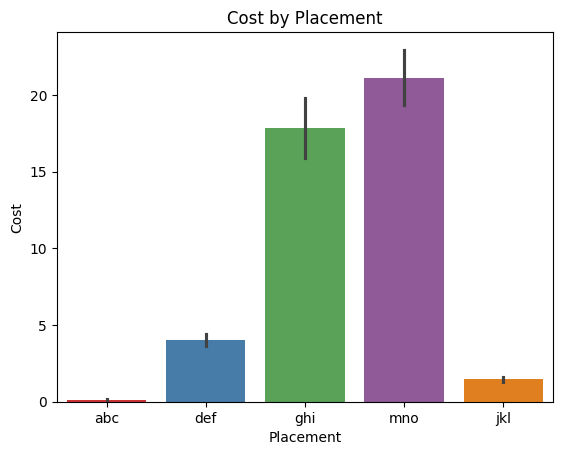

In [129]:
sns.barplot(x='placement', y='cost', data=ad, palette='Set1')
plt.title('Cost by Placement')
plt.xlabel('Placement')
plt.ylabel('Cost')
plt.show()

#Cost and Revenue Correlation

In [130]:
corr_coeff = ad['cost'].corr(ad['revenue'])
print(f'Correlation coefficient of cost and revenue: {corr_coeff}')

Correlation coefficient of cost and revenue: 0.7605199343382271


In [131]:
covariance_cost_rev = ad['cost'].cov(ad['revenue'])
print("Covariance between cost and revenue :", covariance_cost_rev)

Covariance between cost and revenue : 3339.399950119442


In [132]:
cos_rev = ad['displays'] * ad['cost']
print(cos_rev)

0        2.400000e-02
1        5.402010e+05
2        4.061945e+05
3        3.714180e+07
4        3.698400e+01
             ...     
15403    3.984000e-01
15404    9.034296e+02
15405    1.570000e-02
15406    4.920000e-02
15407    3.849456e+02
Length: 15408, dtype: float64


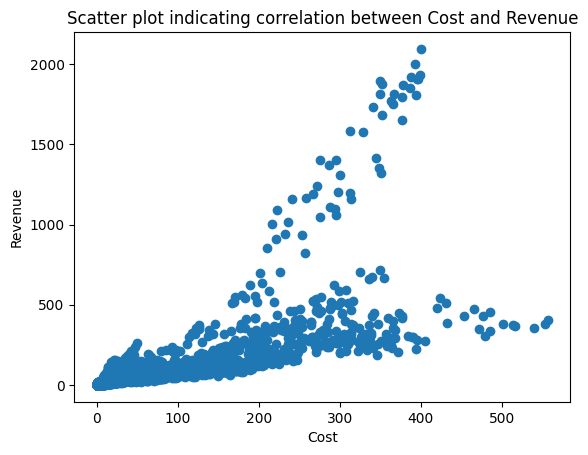

In [133]:
plt.scatter(ad['cost'], ad['revenue'])
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Scatter plot indicating correlation between Cost and Revenue')
plt.show()

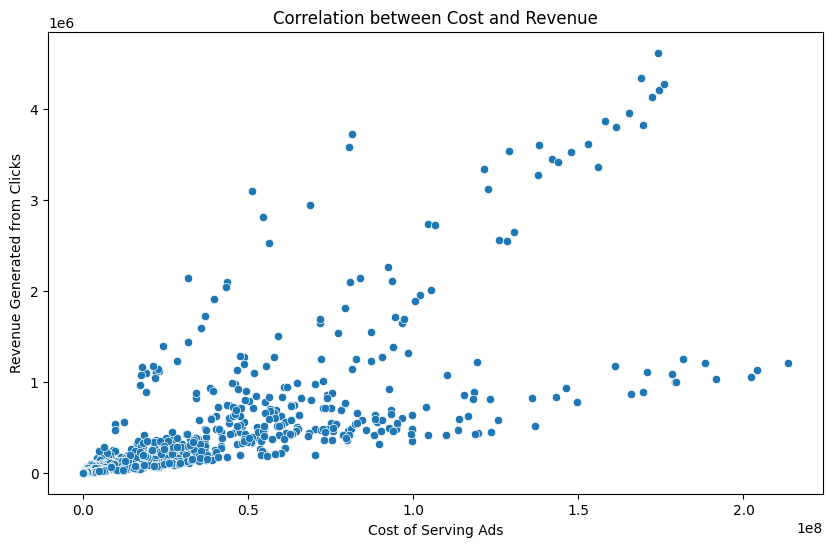

Correlation coefficient between cost and revenue: 0.80


In [134]:
revenue = ad['clicks'] * ad['cost']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=cos_rev, y=revenue)
plt.xlabel('Cost of Serving Ads')
plt.ylabel('Revenue Generated from Clicks')
plt.title('Correlation between Cost and Revenue')
plt.show()

correlation = np.corrcoef(cos_rev, revenue)[0, 1]
print(f"Correlation coefficient between cost and revenue: {correlation:.2f}")


In [135]:
ad[['cost' , 'revenue']]

,cost,revenue
0,0.0060,0.0000
1,26.7824,28.9717
2,27.6304,28.9771
3,216.8750,329.4518
4,0.0670,0.1834
...,...,...
15403,0.0249,0.0000
15404,0.4044,1.8347
15405,0.0157,0.0000
15406,0.0123,0.0000


#Average revenue generated per click


In [136]:

tot_revenue = ad['revenue'].sum()
tot_clicks = ad['clicks'].sum()
avg_revenue_per_click = tot_revenue / tot_clicks
print("Average revenue generated per click:", avg_revenue_per_click)


Average revenue generated per click: 0.1108233559193802


<ipython-input-137-643cde056a71>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='placement', y='revenue_per_click', data=rev_placement, palette='Blues_d')


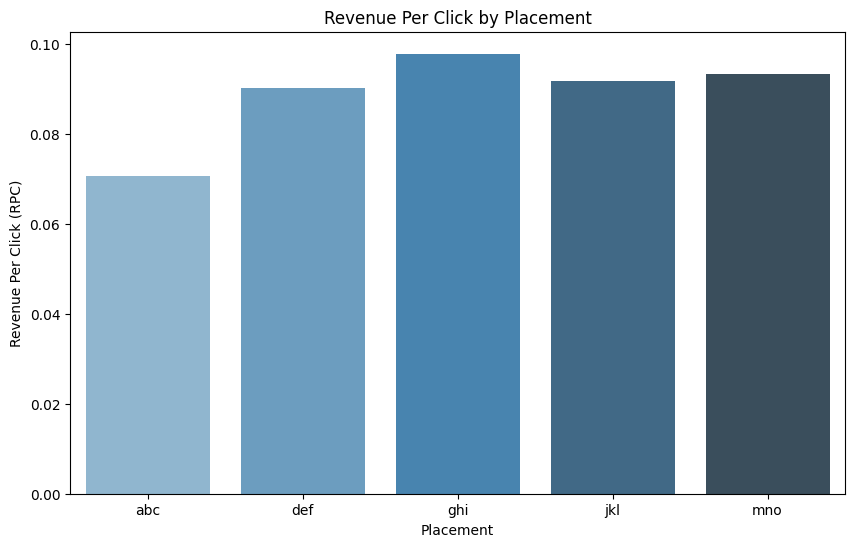

In [137]:
ad['revenue_per_click'] = ad['revenue'] / ad['clicks']

rev_placement = ad.groupby('placement')['revenue_per_click'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='placement', y='revenue_per_click', data=rev_placement, palette='Blues_d')
plt.title('Revenue Per Click by Placement')
plt.xlabel('Placement')
plt.ylabel('Revenue Per Click (RPC)')
plt.show()

#Campaigns with highest post-click conversion rates

In [138]:
filter_ad = ad[ad['clicks'] != 0]
filter_ad['post_click_conversion_rate'] = filter_ad['post_click_conversions'] / filter_ad['clicks']
campaign_conversion_rates = filter_ad.groupby('campaign_number')['post_click_conversion_rate'].mean()
print(campaign_conversion_rates)
highest_conversion_campaign = campaign_conversion_rates.idxmax()
print("Campaign with the highest post-click conversion rate:")
print("Campaign:", highest_conversion_campaign)



campaign_number
camp 1    0.356967
camp 2    0.020079
camp 3    0.045453
Name: post_click_conversion_rate, dtype: float64
Campaign with the highest post-click conversion rate:
Campaign: camp 1


<ipython-input-138-f6d53b49e1b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ad['post_click_conversion_rate'] = filter_ad['post_click_conversions'] / filter_ad['clicks']


# Specific Trends or patterns in post-click sales amount over time

month
April    2104.983998
June     1759.530637
May      2490.482227
Name: post_click_sales_amount, dtype: float64


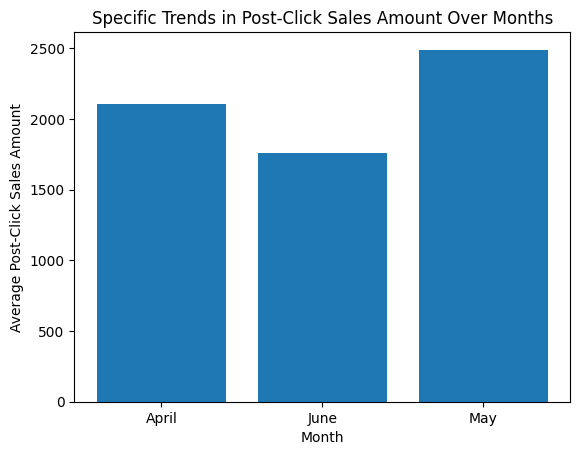

In [139]:

monthly_sales = ad.groupby('month')['post_click_sales_amount'].mean()
print(monthly_sales)
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Average Post-Click Sales Amount')
plt.title('Specific Trends in Post-Click Sales Amount Over Months')
plt.show()


# Variation of level of user engagement across different banner sizes

banner
160 x 600    1.990582
240 x 400    1.950928
300 x 250    1.972695
468 x 60     2.038968
580 x 400    1.950495
670 x 90     1.979167
728 x 90     2.003501
800 x 250    2.155989
Name: user_engagement_val, dtype: float64


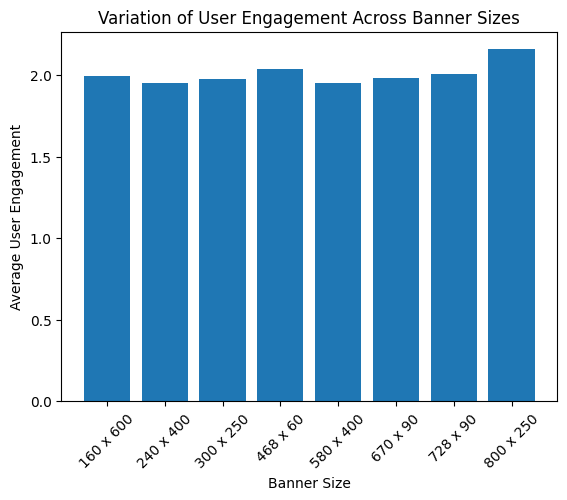

In [140]:
engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
ad['user_engagement_val'] = ad['user_engagement'].map(engagement_mapping)
engagement_banner = ad.groupby('banner')['user_engagement_val'].mean()
print(engagement_banner)
plt.bar(engagement_banner.index, engagement_banner.values)
plt.xlabel('Banner Size')
plt.ylabel('Average User Engagement')
plt.title('Variation of User Engagement Across Banner Sizes')
plt.xticks(rotation=45)
plt.show()

#Campaign with highest post-click-conversion rates

In [141]:
filter_ad = ad[ad['clicks'] != 0]
filter_ad['post_click_conversion_rate'] = filter_ad['post_click_conversions'] / filter_ad['clicks']
campaign_conversion_rates = filter_ad.groupby('campaign_number')['post_click_conversion_rate'].mean()
print(campaign_conversion_rates)
highest_conversion_campaign = campaign_conversion_rates.idxmax()
print("Campaign with the highest post-click conversion rate:", highest_conversion_campaign)


campaign_number
camp 1    0.356967
camp 2    0.020079
camp 3    0.045453
Name: post_click_conversion_rate, dtype: float64
Campaign with the highest post-click conversion rate: camp 1


<ipython-input-141-8e5000e411f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ad['post_click_conversion_rate'] = filter_ad['post_click_conversions'] / filter_ad['clicks']


#Placement types result in the highest post-click conversion rates

In [142]:
filter_ad = ad[ad['clicks'] != 0]
filter_ad['post_click_conversion_rate'] = filter_ad['post_click_conversions'] / filter_ad['clicks']
placement_conversion_rates = filter_ad.groupby('placement')['post_click_conversion_rate'].mean()
print(placement_conversion_rates)
highest_conversion_placement = placement_conversion_rates.idxmax()
print("Placement types with  highest post-click conversion rate:", highest_conversion_placement)


placement
abc    0.301971
def    0.152955
ghi    0.187649
jkl    0.224332
mno    0.182342
Name: post_click_conversion_rate, dtype: float64
Placement types with  highest post-click conversion rate: abc


<ipython-input-142-ee8db6649b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ad['post_click_conversion_rate'] = filter_ad['post_click_conversions'] / filter_ad['clicks']


#Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

        displays   clicks
month                    
April  128866631  1661125
June    44094487   291808
May     66056607   539904


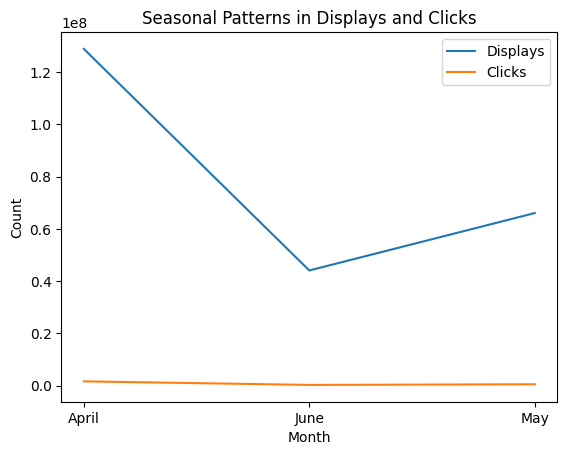

In [143]:

camp_data = ad.groupby('month')[['displays', 'clicks']].sum()
print(camp_data)
plt.plot(camp_data.index, camp_data['displays'], label='Displays')
plt.plot(camp_data.index, camp_data['clicks'], label='Clicks')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Seasonal Patterns in Displays and Clicks')
plt.legend()
plt.show()


#Is there a correlation between user engagement levels and the revenue generated?

user_engagement
High      212263.8837
Low         5146.2289
Medium     58854.4495
Name: revenue, dtype: float64


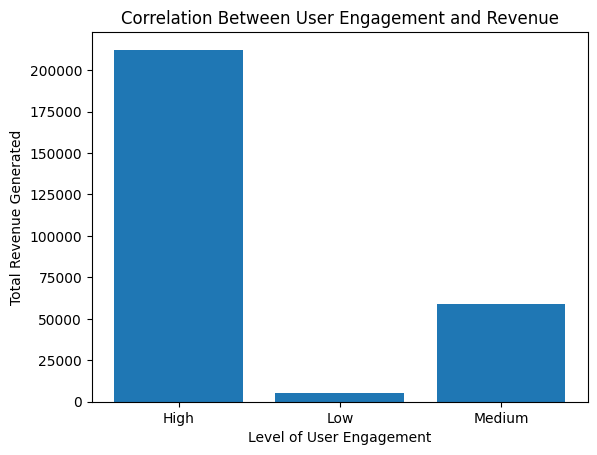

In [144]:
corr_rev_user = ad.groupby('user_engagement')['revenue'].sum()
print(corr_rev_user)
plt.bar(corr_rev_user.index, corr_rev_user.values)
plt.xlabel('Level of User Engagement')
plt.ylabel('Total Revenue Generated')
plt.title('Correlation Between User Engagement and Revenue')
plt.show()


#Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

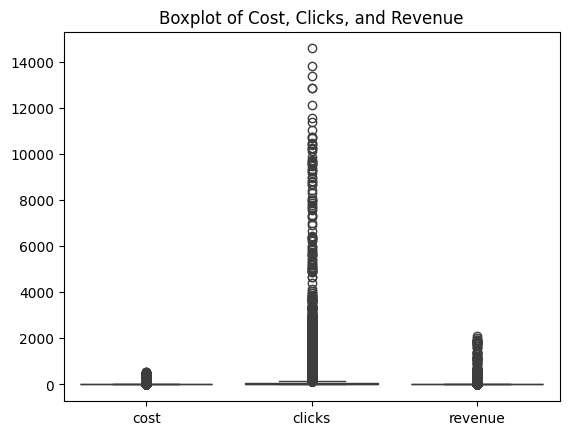

In [159]:
sns.boxplot(data=ad[['cost', 'clicks', 'revenue']])
plt.title('Boxplot of Cost, Clicks, and Revenue')
plt.show()


#Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

#How does the effectiveness of campaigns vary based on the size of the ad and placement type?

In [146]:
engagement_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
ad['user_engagement_numeric'] = ad['user_engagement'].map(engagement_mapping)

cost_effectiveness = ad.groupby(['campaign_number','banner', 'placement','user_engagement']).value_counts()
print(cost_effectiveness)


Series([], Name: count, dtype: int64)


In [147]:
engagement_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
ad['user_engagement_numeric'] = ad['user_engagement'].map(engagement_mapping)

if 2 in ad['campaign_number'].values:
    print("Campaign 2 exists in the DataFrame.")
else:
    print("Campaign 2 does not exist in the DataFrame.")

if ad['campaign_number'].isnull().values.any():
    print("There are NaN values in 'campaign_number'.")
    ad['campaign_number'].fillna(0, inplace=True)

cost_effectiveness = ad.groupby(['campaign_number', 'banner', 'placement'])['user_engagement_numeric'].mean()
print(cost_effectiveness)

Campaign 2 does not exist in the DataFrame.
campaign_number  banner     placement
camp 1           160 x 600  abc          2.760870
                            def          2.000000
                            ghi          2.000000
                            jkl          2.000000
                            mno          1.995633
                                           ...   
camp 3           728 x 90   def          2.000000
                            ghi          2.000000
                            jkl          2.000000
                            mno          2.000000
                 800 x 250  mno          1.925714
Name: user_engagement_numeric, Length: 86, dtype: float64


In [148]:
filter_ad = ad[ad['clicks'] != 0]
post_click_conversion_rate = filter_ad['post_click_conversions'] / filter_ad['clicks']
user_engagement_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
ad['user_engagement_numeric'] = ad['user_engagement'].map(user_engagement_mapping)
effectiveness = filter_ad.groupby(['banner', 'placement'])['user_engagement_numeric'].mean()
print(effectiveness)

banner     placement
160 x 600  abc          2.000000
           def          2.004237
           ghi          2.179167
           mno          1.947368
240 x 400  def          2.008726
           ghi          1.950495
           jkl          2.080979
           mno          1.984615
300 x 250  abc          2.356164
           def          2.006993
           ghi          1.982935
           jkl          2.421456
           mno          1.950495
468 x 60   def          2.166667
           ghi          2.672727
           jkl          2.666667
           mno          2.262626
580 x 400  mno          1.976271
670 x 90   def          2.047904
           ghi          2.257862
           jkl          2.335227
           mno          2.087891
728 x 90   abc          2.202020
           def          1.979592
           ghi          1.993092
           jkl          2.164905
           mno          1.950495
800 x 250  mno          2.300000
Name: user_engagement_numeric, dtype: float64


#Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

<ipython-input-156-c90e65f662c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ad['ROI'] = (filter_ad['revenue'] - filter_ad['cost']) / filter_ad['cost']


Top Performing Campaigns and Banner Sizes by ROI:
   campaign_number     banner       ROI
16          camp 3  160 x 600  3.096757
0           camp 1  160 x 600  2.931911
12          camp 2  580 x 400  2.113678
20          camp 3  580 x 400  2.004255
1           camp 1  240 x 400  1.531187
2           camp 1  300 x 250  1.171725
4           camp 1  580 x 400  1.070334
9           camp 2  240 x 400  0.906611
13          camp 2   670 x 90  0.851741
21          camp 3   670 x 90  0.803126


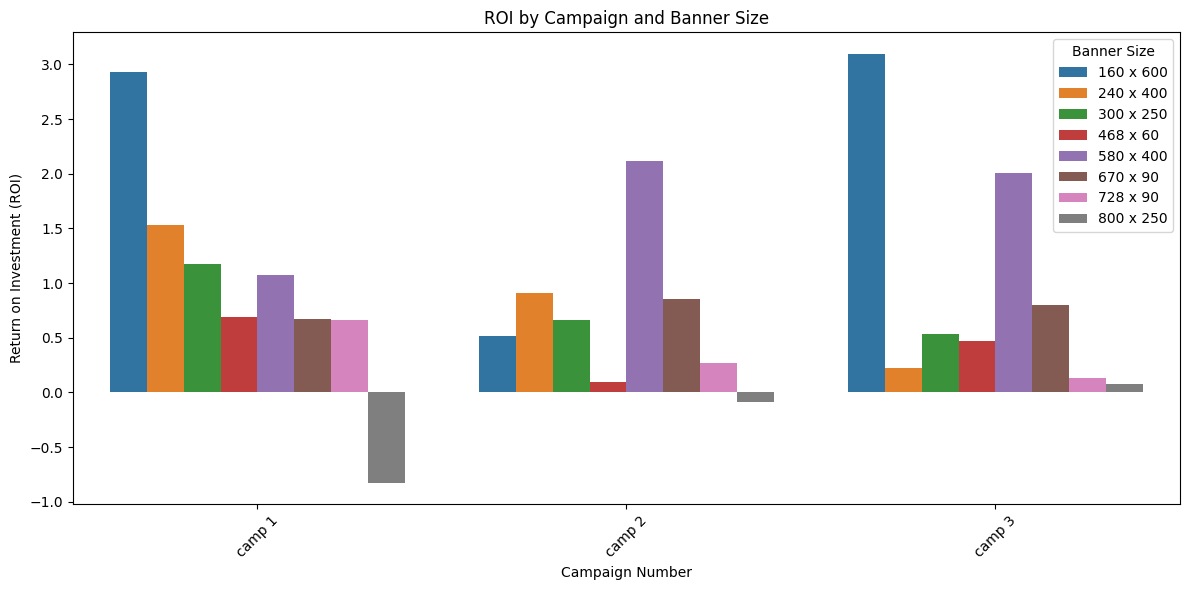

In [156]:
filter_ad = ad[ad['cost'] != 0]
filter_ad['ROI'] = (filter_ad['revenue'] - filter_ad['cost']) / filter_ad['cost']
roi_by_campaign_banner = filter_ad.groupby(['campaign_number', 'banner'])['ROI'].mean().reset_index()
top_campaigns = roi_by_campaign_banner.sort_values('ROI', ascending=False).head(10)
print("Top Performing Campaigns and Banner Sizes by ROI:")
print(top_campaigns)
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_number', y='ROI', hue='banner', data=roi_by_campaign_banner)
plt.title('ROI by Campaign and Banner Size')
plt.xlabel('Campaign Number')
plt.ylabel('Return on Investment (ROI)')
plt.xticks(rotation=45)
plt.legend(title='Banner Size')
plt.tight_layout()
plt.show()


#What is the distribution of post-click conversions across different placement types?

placement
abc       824
def     29856
ghi    337063
jkl     20853
mno    263170
Name: post_click_conversions, dtype: int64


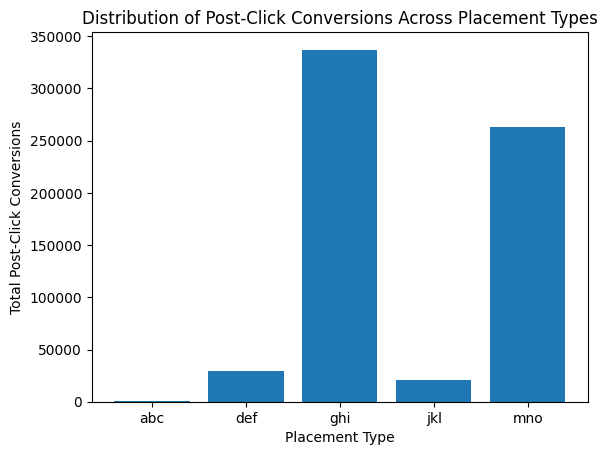

In [150]:
conv_placement = ad.groupby('placement')['post_click_conversions'].sum()
print(conv_placement)
plt.bar(conv_placement.index, conv_placement.values)
plt.xlabel('Placement Type')
plt.ylabel('Total Post-Click Conversions')
plt.title('Distribution of Post-Click Conversions Across Placement Types')
plt.show()


#Are there any noticeable differences in user engagement levels between weekdays and weekends?

In [151]:
month_map = {'April':'04', 'May':'05', 'June' : '06'}
ad['month'] = ad['month'].apply(lambda x: month_map[x])
ad['date'] = ad['month'].astype(str) + '/' + ad['day'].astype(str) + '/2020'
ad['date'] = pd.to_datetime(ad['date'], format='%m/%d/%Y')
ad['weekday'] = ad['date'].dt.day_name()
engagement_weekday = ad.groupby('weekday')['user_engagement'].value_counts().unstack().fillna(0)
print("User Engagement by Weekday:")
print(engagement_weekday)



User Engagement by Weekday:
user_engagement  High  Low  Medium
weekday                           
Friday            692  706     766
Monday            705  721     779
Saturday          702  713     779
Sunday            705  719     790
Thursday          693  724     792
Tuesday           698  711     780
Wednesday         689  741     803


#How does the cost per click (CPC) vary across different campaigns and banner sizes?

In [152]:
filter_ad = ad[ad['clicks'] != 0]
filter_ad['CPC'] = filter_ad['cost'] / filter_ad['clicks']
cpc_range = filter_ad.groupby(['campaign_number', 'banner'])['CPC'].mean()
print(cpc_range)

campaign_number  banner   
camp 1           160 x 600    0.129092
                 240 x 400    0.090170
                 300 x 250    0.105006
                 468 x 60     0.215289
                 580 x 400    0.101816
                 670 x 90     0.128271
                 728 x 90     0.101945
                 800 x 250    0.028383
camp 2           160 x 600    0.039206
                 240 x 400    0.023859
                 300 x 250    0.028858
                 468 x 60     0.029528
                 580 x 400    0.013092
                 670 x 90     0.033663
                 728 x 90     0.031628
                 800 x 250    0.007000
camp 3           160 x 600    0.053341
                 240 x 400    0.077506
                 300 x 250    0.051141
                 468 x 60     0.010349
                 580 x 400    0.037167
                 670 x 90     0.050906
                 728 x 90     0.086102
                 800 x 250    0.000500
Name: CPC, dtype: float64


<ipython-input-152-47d289b60a94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ad['CPC'] = filter_ad['cost'] / filter_ad['clicks']


#Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

In [153]:
filter_ad = ad[ad['post_click_conversions'] != 0]

filter_ad['cost_per_conversion'] = filter_ad['cost'] / filter_ad['post_click_conversions']

cost_effectiveness = filter_ad.groupby(['campaign_number', 'placement'])['cost_per_conversion'].mean().reset_index()

cost_effectiveness = cost_effectiveness.sort_values('cost_per_conversion')

print(cost_effectiveness.head(10))


   campaign_number placement  cost_per_conversion
0           camp 1       abc             0.163195
3           camp 1       jkl             0.263877
9           camp 3       abc             0.317597
2           camp 1       ghi             0.325304
4           camp 1       mno             0.474666
1           camp 1       def             0.576989
10          camp 3       def             0.873166
12          camp 3       jkl             0.976729
7           camp 2       jkl             1.140003
8           camp 2       mno             1.552726


<ipython-input-153-cd0d36821df1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_ad['cost_per_conversion'] = filter_ad['cost'] / filter_ad['post_click_conversions']


#Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

In [154]:
month_map = {'April':'04', 'May':'05', 'June' : '06'}

ad['date'] = ad['month'].astype(str) + '/' + ad['day'].astype(str) + '/2020'
ad['date'] = pd.to_datetime(ad['date'], format='%m/%d/%Y')
ad['weekday'] = ad['date'].dt.day_name()
conv_weekday = ad.groupby('weekday')['post_click_conversions'].mean().fillna(0)
print("Post-click-conversions by Weekday:")
print(conv_weekday)


Post-click-conversions by Weekday:
weekday
Friday       38.493530
Monday       44.569161
Saturday     44.490884
Sunday       45.041102
Thursday     34.679040
Tuesday      45.234354
Wednesday    43.544559
Name: post_click_conversions, dtype: float64


#How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

In [155]:
ad.fillna({'campaign_number': 0, 'user_engagement': 'Unknown', 'post_click_conversions': 0}, inplace=True)
campaign_effectiveness_by_engagement = ad.groupby(['campaign_number', 'user_engagement'])['post_click_conversions'].mean().reset_index()
pivot_table = campaign_effectiveness_by_engagement.pivot_table(index='campaign_number',
                                                      columns='user_engagement',
                                                      values='post_click_conversions',
                                                      fill_value=0)
print(pivot_table)


user_engagement        High       Low     Medium
campaign_number                                 
camp 1           237.491728  0.293827   6.768309
camp 2             0.000000  1.109067  15.150059
camp 3             1.610941  0.066696   0.455308
